# Lab 7

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [22]:
np.random.seed(42)

## Task 1

In [23]:
customers_df = pd.read_csv('BankCustomersData_PCLab7.csv')
customers_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [24]:
# Check for missing values
print(customers_df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [25]:
# Create means for missing values
credit_limit_mean = customers_df['CREDIT_LIMIT'].mean()
minimum_payments_mean = customers_df['MINIMUM_PAYMENTS'].mean()

# Substitute missing values with means
customers_df['CREDIT_LIMIT'].fillna(credit_limit_mean, inplace=True)        
customers_df['MINIMUM_PAYMENTS'].fillna(minimum_payments_mean, inplace=True)

# Check for missing values again
print(customers_df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


/var/folders/rx/w1hnwhnx0yd75fmrmyfvf0680000gn/T/ipykernel_20184/3898008047.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df['CREDIT_LIMIT'].fillna(credit_limit_mean, inplace=True)
/var/folders/rx/w1hnwhnx0yd75fmrmyfvf0680000gn/T/ipykernel_20184/3898008047.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [26]:
# Check for duplicates
print(customers_df.duplicated().sum())

0


In [27]:
# Print average credit limit
print(f'The average credit limit is: {round(credit_limit_mean, 2)}')

The average credit limit is: 4494.45


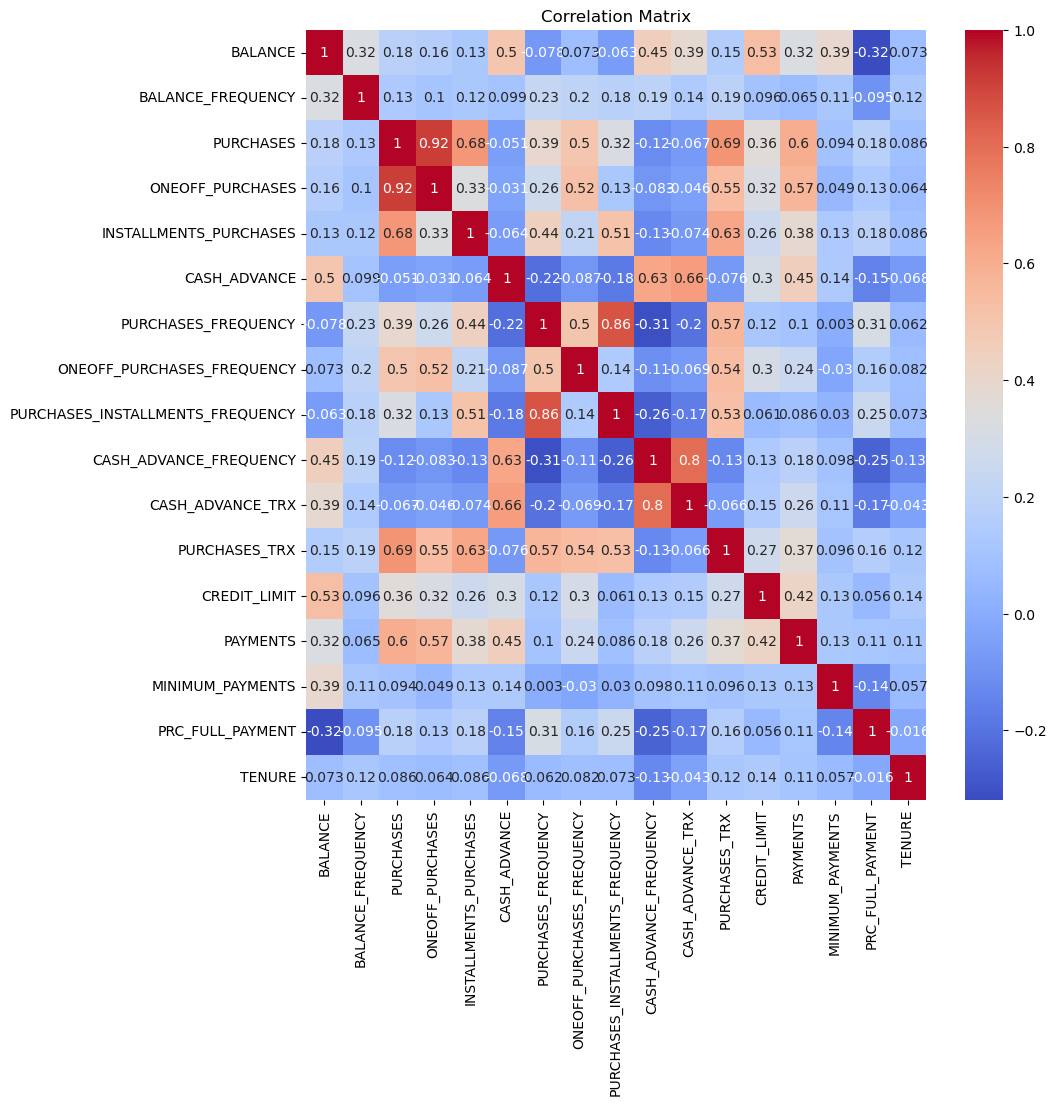

In [28]:
# Correlation matrix using seaborn
correlation_matrix = customers_df.iloc[:,1:].corr() # remove the first column as it contains the customer IDs
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

As it can be observed from the correlation matrix, most variables present a weak correlation with each other. Moderate to high correlations can mostly be observed for variables having intuitive relationships, such as purchases and payments, or the predictors referring to the different aspects of purchases (purchases transactions, purchases frequency, etc.)

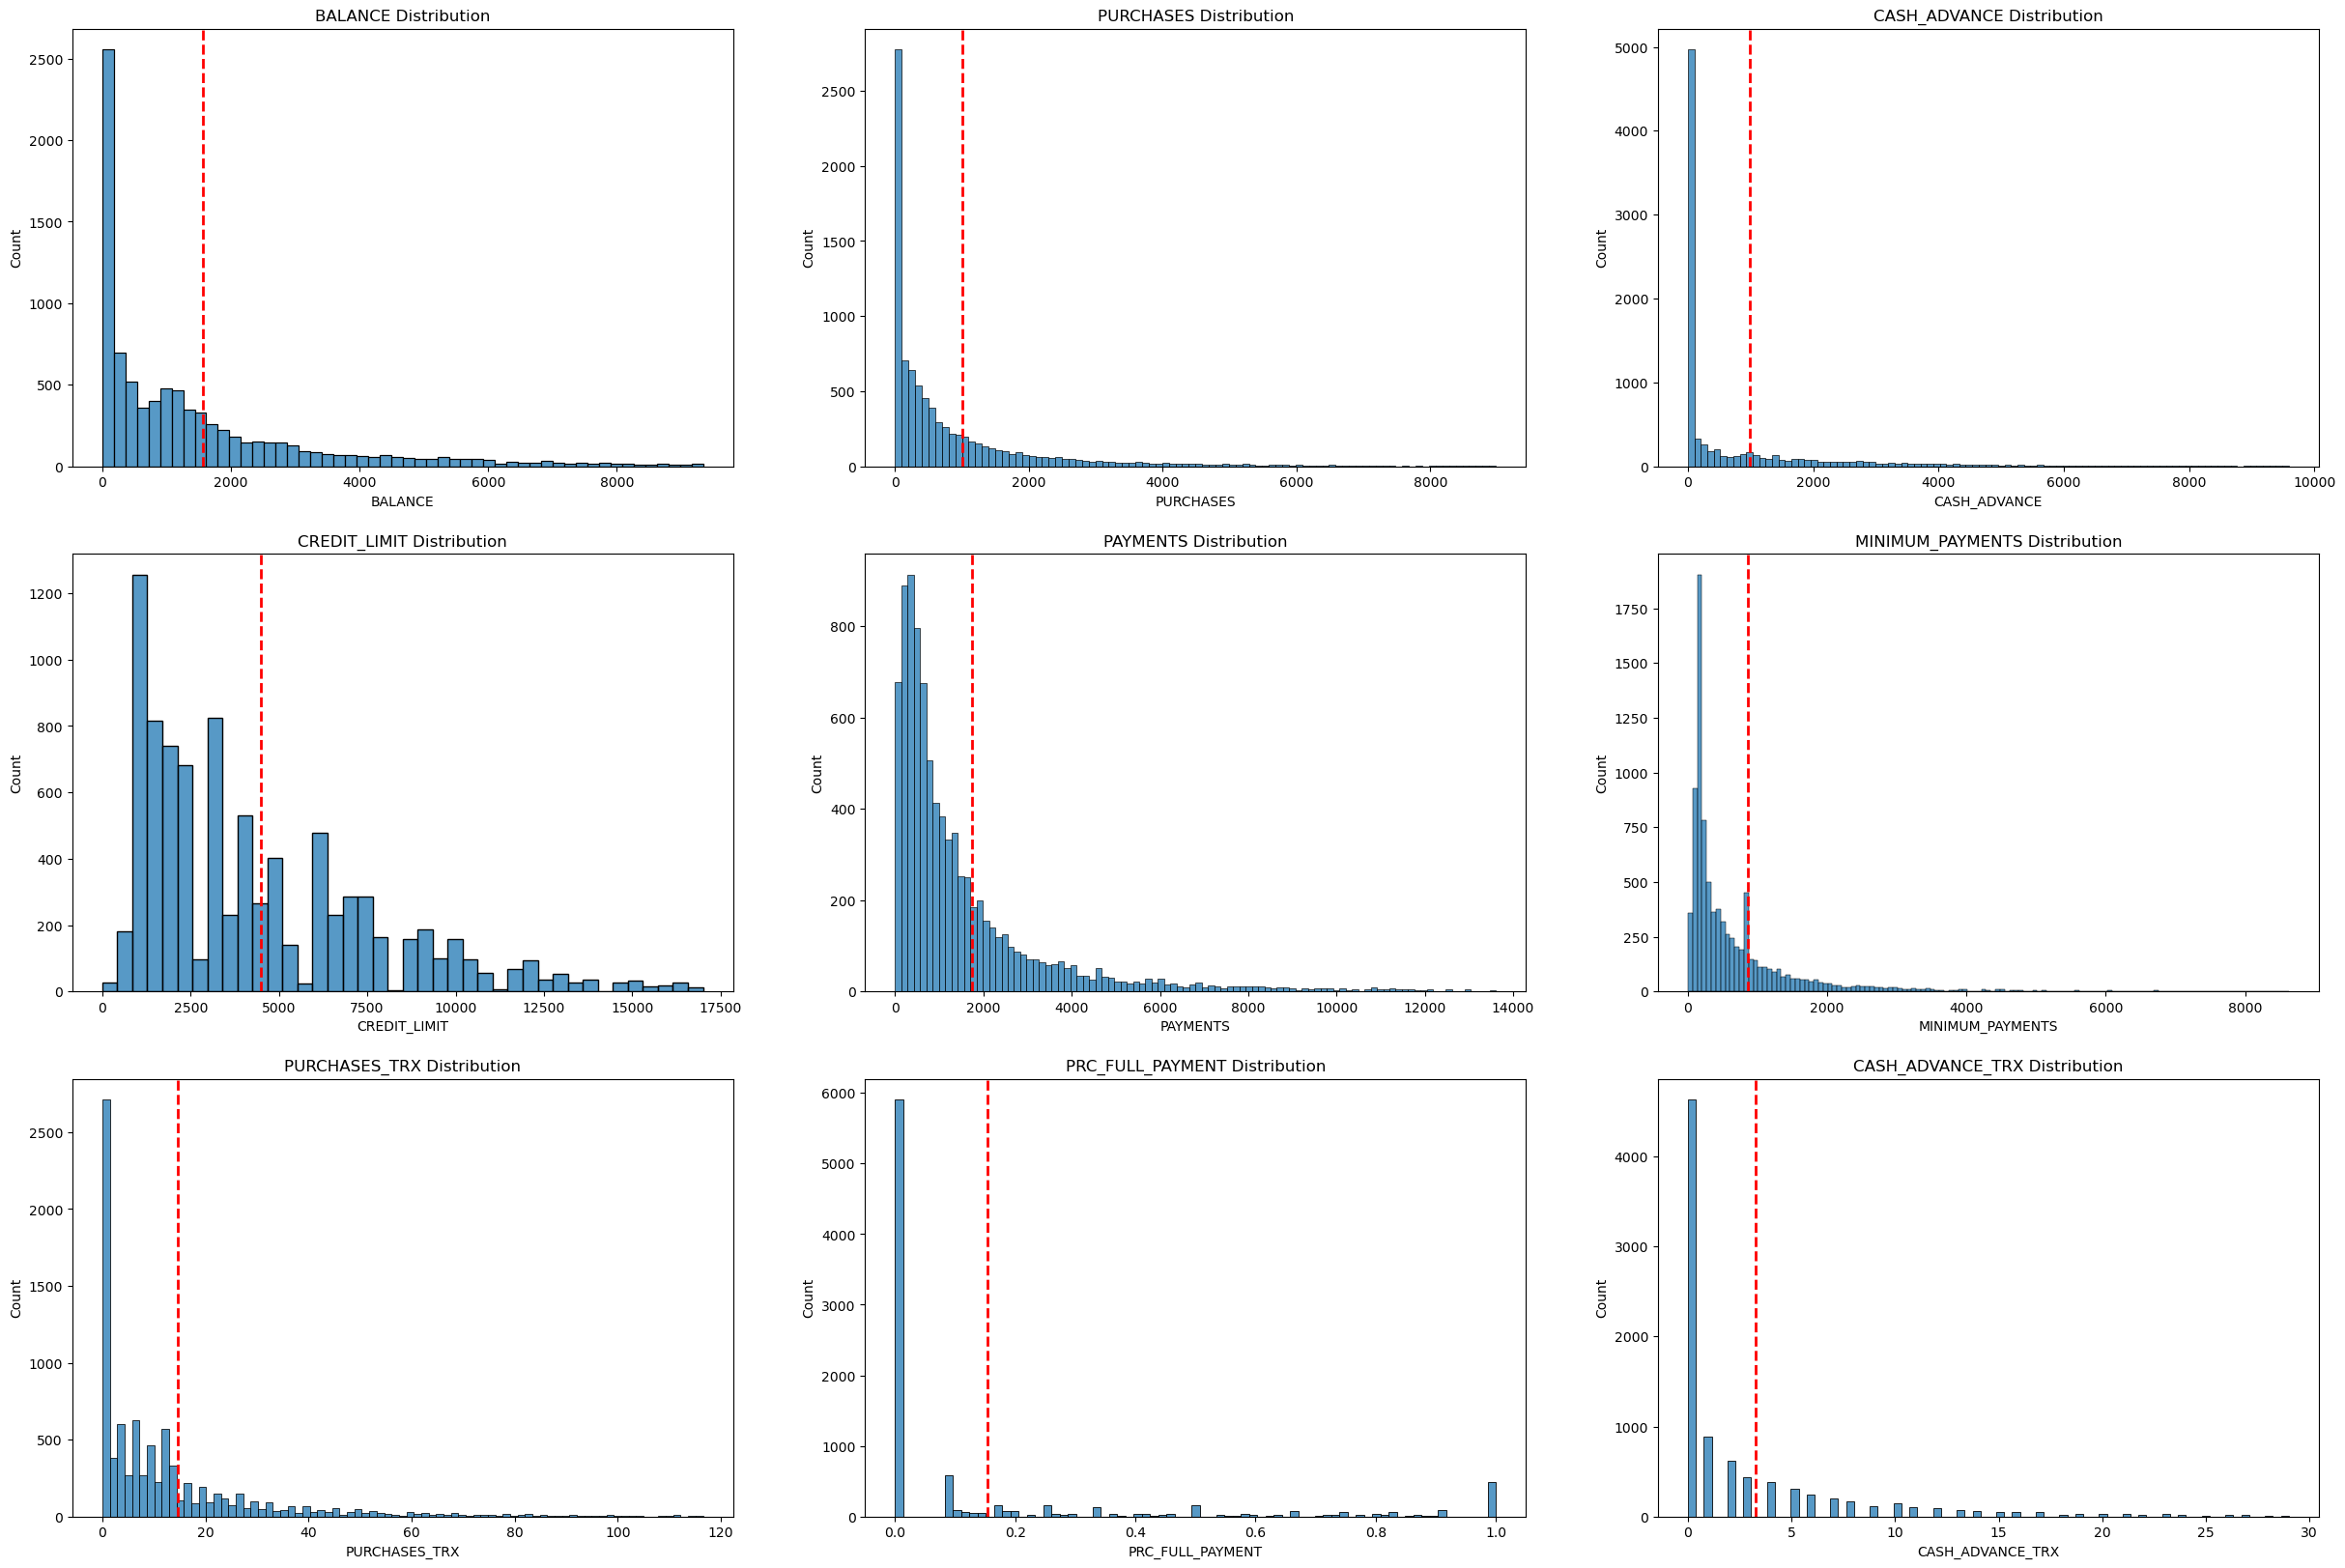

In [29]:
# Define a set of key features
key_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT', 'CASH_ADVANCE_TRX']

# Plot the key features using pyplot
fig, ax = plt.subplots(3, 3, figsize=(30, 20))
for i, feature in enumerate(key_features):
    sns.histplot(customers_df[feature], ax=ax[i//3, i%3], binrange=(0, customers_df[feature].quantile(0.99)))
    ax[i//3, i%3].axvline(customers_df[feature].mean(), color='red', linestyle='dashed', linewidth=2)
    ax[i//3, i%3].set_title(f'{feature} Distribution')

Histograms of the set of chosen variables reveal positively skewed distributions, which can be associated to power law distributions. Most of the data are concentrated on the lower end of the scale, while a smaller number of high values extend towards the right, thus creating a very long tail. 
More specifically, accounts tend to have low values across the chosen financial attributes, such as balance, purchases, cash advances and payments. 

## Task 2

In [30]:
# Scale the data
scaler = StandardScaler()
data_df_scaled = scaler.fit_transform(customers_df.iloc[:,1:])
data_df_scaled = pd.DataFrame(data_df_scaled, columns=customers_df.columns[1:])
data_df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


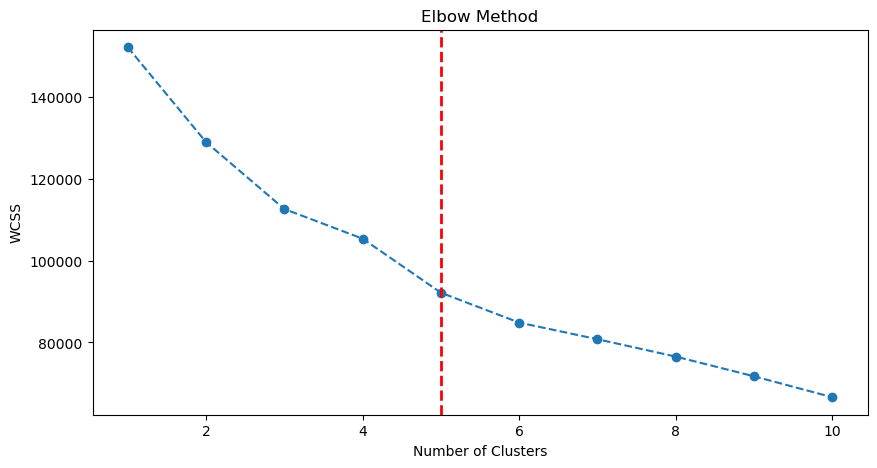

In [31]:
# Optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_df_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(5, color='red', linestyle='dashed', linewidth=2, label='Optimal Number of Clusters')
plt.show()

By applying the elbow method, it appears that the optimal number of clusters is 5. 

In [32]:
# Kmeans using 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
customers_df['Cluster'] = kmeans.fit_predict(data_df_scaled)
customers_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [33]:
# Describe the clusters
cluster_means = customers_df.iloc[:,1:].groupby('Cluster').mean()
cluster_means

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,4901.241786,0.967162,551.983377,347.758605,204.327573,4982.037485,0.313364,0.153149,0.203718,0.507043,15.482305,8.587462,8060.469712,3853.894278,2073.175177,0.038165,11.414560
1,3588.990384,0.986874,7815.732886,5203.519089,2613.732785,661.788641,0.944730,0.740963,0.785823,0.071074,2.106329,90.351899,9769.620253,7409.095001,1991.773372,0.291103,11.949367
2,930.357741,0.962886,1299.705338,633.167216,666.735496,226.754889,0.897121,0.313579,0.719275,0.044345,0.828382,23.034766,4272.477078,1388.751132,650.399938,0.264987,11.610303
3,1524.610238,0.965721,255.629606,206.571304,49.407619,792.368773,0.159106,0.090879,0.067320,0.160476,3.035140,2.884072,3241.762452,958.334442,814.901012,0.022044,11.508046
4,111.260364,0.381755,335.222822,199.440295,136.001245,325.747598,0.281932,0.072926,0.198278,0.037617,0.788504,4.279293,3688.455338,1076.939244,264.030094,0.233951,11.270450


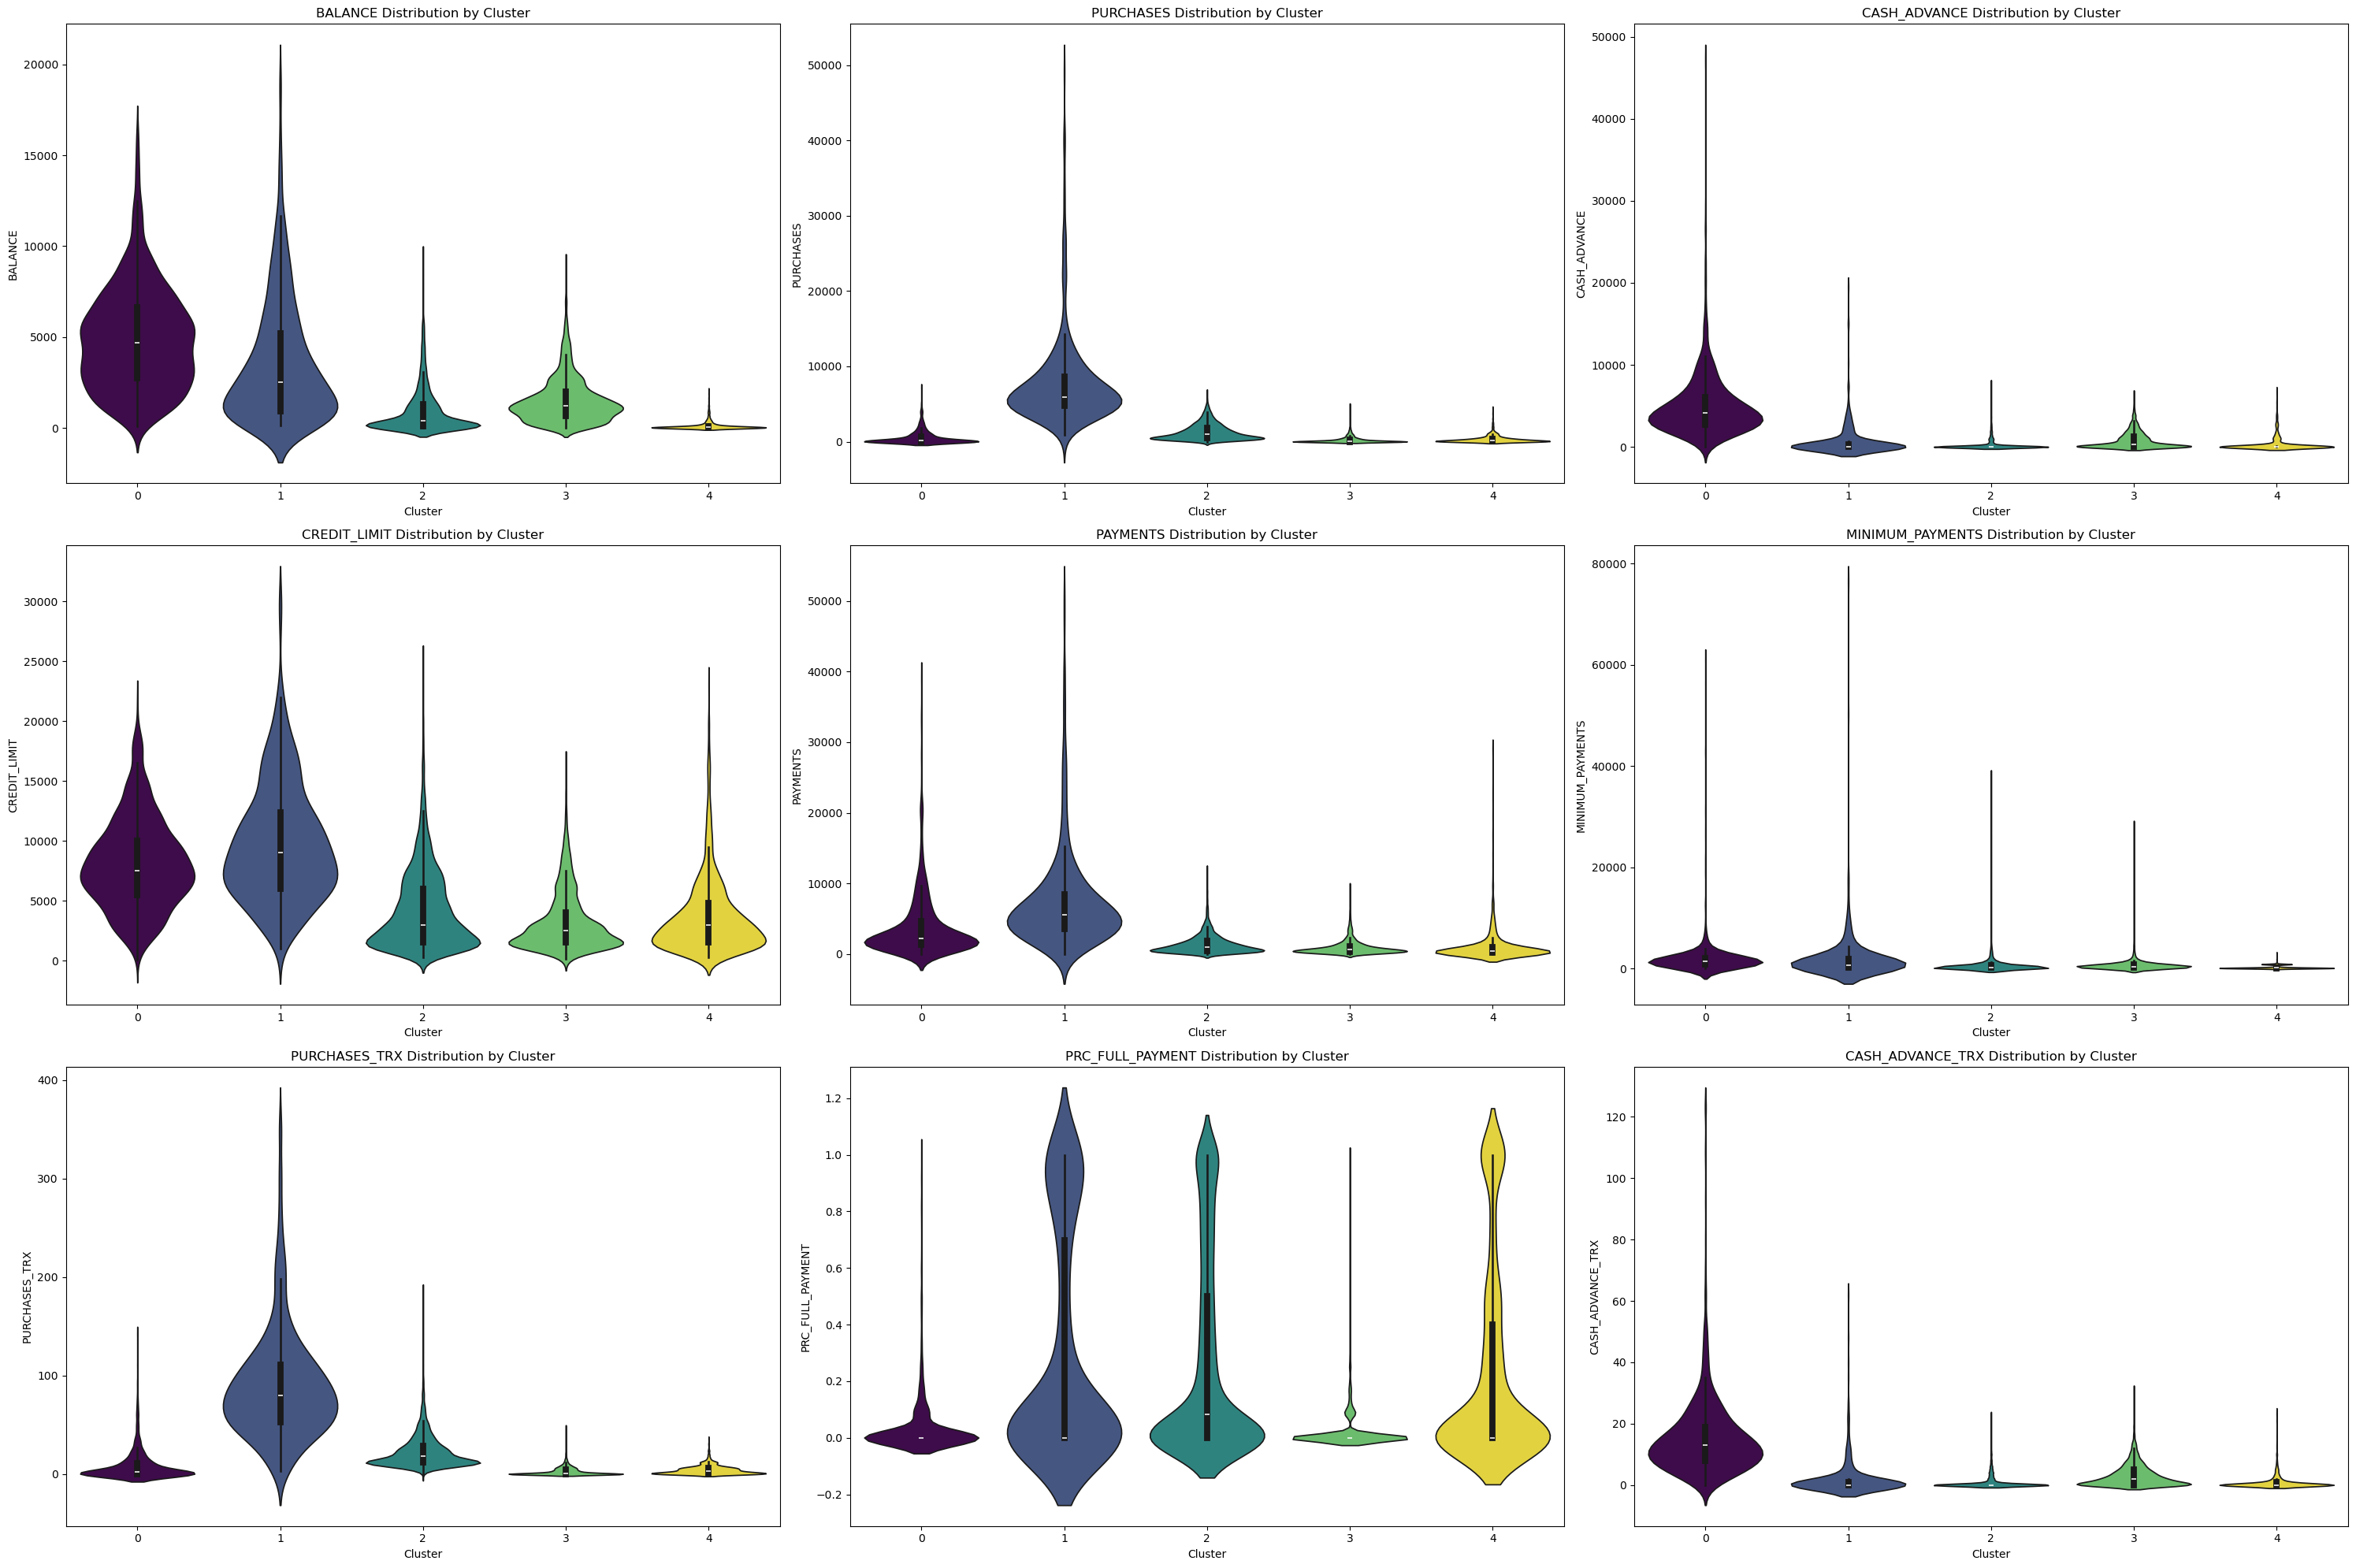

In [34]:
# Description of the clusters
fig, ax = plt.subplots(3, 3, figsize=(30, 20))
for i, feature in enumerate(key_features):
    sns.violinplot(x='Cluster', y=feature, data=customers_df, ax=ax[i//3, i%3], hue='Cluster', legend=False, palette='viridis')
    ax[i//3, i%3].set_title(f'{feature} Distribution by Cluster')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Customer Segment Profiles Based on Credit Usage Metrics')

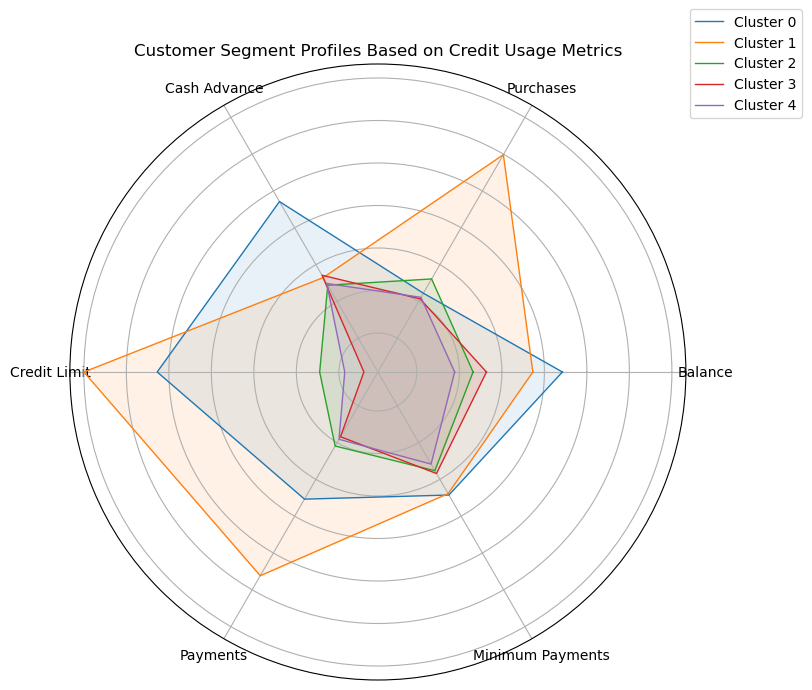

In [35]:
# Sample data for visualization purposes based on the analysis summary
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
balance = [x for x in cluster_means['BALANCE']]
purchases = [x for x in cluster_means['PURCHASES']]
cash_advance = [x for x in cluster_means['CASH_ADVANCE']]
credit_limit = [x for x in cluster_means['CREDIT_LIMIT']]
payments = [x for x in cluster_means['PAYMENTS']]
minimum_payments = [x for x in cluster_means['MINIMUM_PAYMENTS']]

# Normalize data for radar plot
max_value = max(max(balance), max(purchases), max(cash_advance), max(credit_limit), max(payments), max(minimum_payments))
balance_norm = [(b - np.mean(balance)) / (max_value - np.mean(balance)) for b in balance]
purchases_norm = [(p - np.mean(purchases)) / (max_value - np.mean(purchases)) for p in purchases]
cash_advance_norm = [(c - np.mean(cash_advance)) / (max_value - np.mean(cash_advance)) for c in cash_advance]
credit_limit_norm = [(cl - np.mean(credit_limit)) / (max_value - np.mean(credit_limit)) for cl in credit_limit]
payments_norm = [(p - np.mean(payments)) / (max_value - np.mean(payments)) for p in payments]
minimum_payments_norm = [(mp - np.mean(minimum_payments)) / (max_value - np.mean(minimum_payments)) for mp in minimum_payments]

# Radar plot setup
labels = ['Balance', 'Purchases', 'Cash Advance', 'Credit Limit', 'Payments', 'Minimum Payments']
num_vars = len(labels)

# Create angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, cluster in enumerate(clusters):
    values = [balance_norm[i], purchases_norm[i], cash_advance_norm[i], credit_limit_norm[i], payments_norm[i], minimum_payments_norm[i]]
    values += values[:1]  # Complete the circle for each cluster
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=cluster)
    ax.fill(angles, values, alpha=0.1)

# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

# Title
plt.title('Customer Segment Profiles Based on Credit Usage Metrics')

The identified clusters seem to split customers in neatly separated categories. If we generalize the results, it is evident that clusters 0 and 1 represent 'higher-end' customers, which tend to have higher balances, higher cash advances, more frequent spendings and higher credit limits. Groups 2, 3 and 4, instead, may be referring to 'lower-end customers'. More specifically:
- Cluster 0: customers with high balances and frequent users of cash advances
- Cluster 1: high spenders with substantial credit limits. They may be customers who use credit cards for large purchases
- Cluster 2: these customers all show moderate levels across all metrics, suggesting more conservative spending habits
- Cluster 3 and 4: these customers generally have lower values across most metrics

If the bank wants to specialize on higher spending individuals, which use their credit card as a sort of loan, then the ideal target group is cluster 0. Customers in Cluster 0 have high balances and cash advances, suggesting they might use credit as a loan or revolving debt and could be interested in products that support longer-term credit use or debt consolidation options. Customers in group 1 could also be considered, but primarily for high spend marketing (without the loan focus). These customers exhibit high purchases, balances and credit limits, thus indicating strong spending capacity. Despite that, their levels of cash advance are significantly lower than those of group 0, thus making the latter the best candidate as a target for the campaign. 



## Task 3

In [36]:
# PCA (2 components) for visualization
pca = PCA(n_components=2)
data_df_pca = pca.fit_transform(data_df_scaled.iloc[:,1:]) # we exclude the first column as it contains the customer IDs
data_df_pca = pd.DataFrame(data_df_pca, columns=['PC1', 'PC2'])
data_df_pca['Cluster'] = customers_df['Cluster']
data_df_pca.head()

,PC1,PC2,Cluster
0,-1.551040,-1.032416,3
1,-1.376490,2.268116,0
2,0.960032,-0.576087,2
3,-0.881966,-0.085801,3
4,-1.524799,-0.787017,3


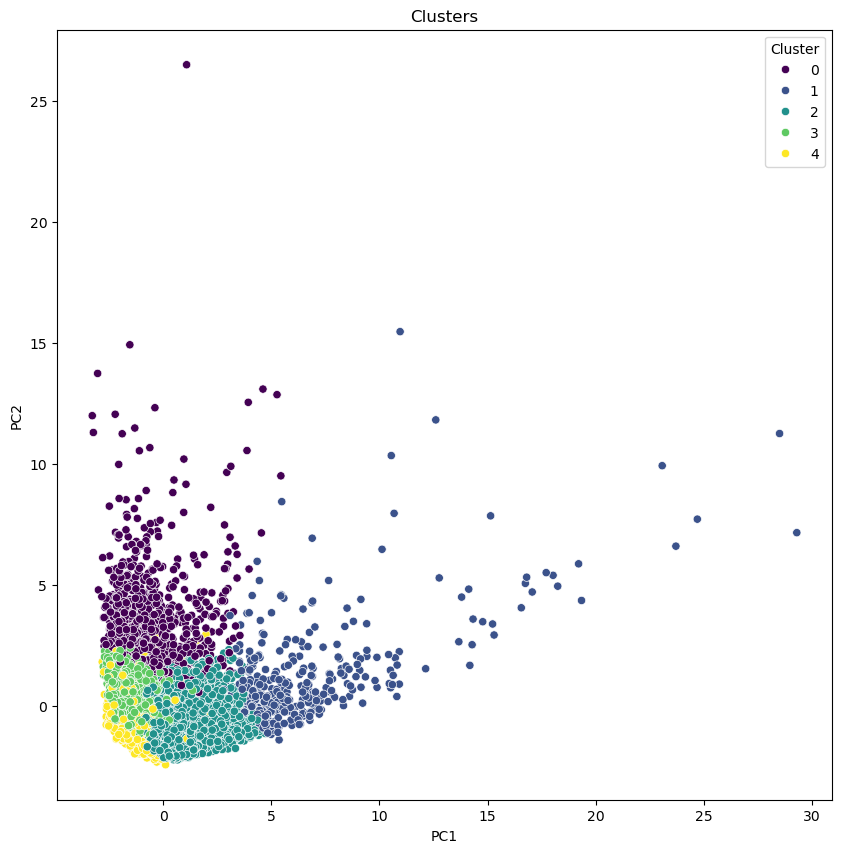

In [37]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', data=data_df_pca, hue='Cluster', palette='viridis')
plt.title('Clusters')
plt.show()

In [38]:
# Define the model
model = Sequential()
model.add(Dense(32, input_shape=(17,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='linear'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(17, activation='sigmoid'))

# Compile the model
model.compile(Adam(learning_rate=0.001), 'mean_squared_error')

# Train the model
model.fit(data_df_scaled, data_df_scaled, epochs=100, verbose=0)

# Predict the reduced dimensions
encoder = Sequential()
encoder.add(model.layers[0])
encoder.add(model.layers[1])
encoder.add(model.layers[2])
data_df_ann = encoder.predict(data_df_scaled)
data_df_ann = pd.DataFrame(data_df_ann, columns=['PC1', 'PC2'])
data_df_ann['Cluster'] = customers_df['Cluster']
data_df_ann.head()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step


,PC1,PC2,Cluster
0,-10.143053,-2.066228,3
1,-1.081027,-4.945108,0
2,-0.343413,0.009454,2
3,-9.035177,-2.578464,3
4,-2.633065,-1.014348,3


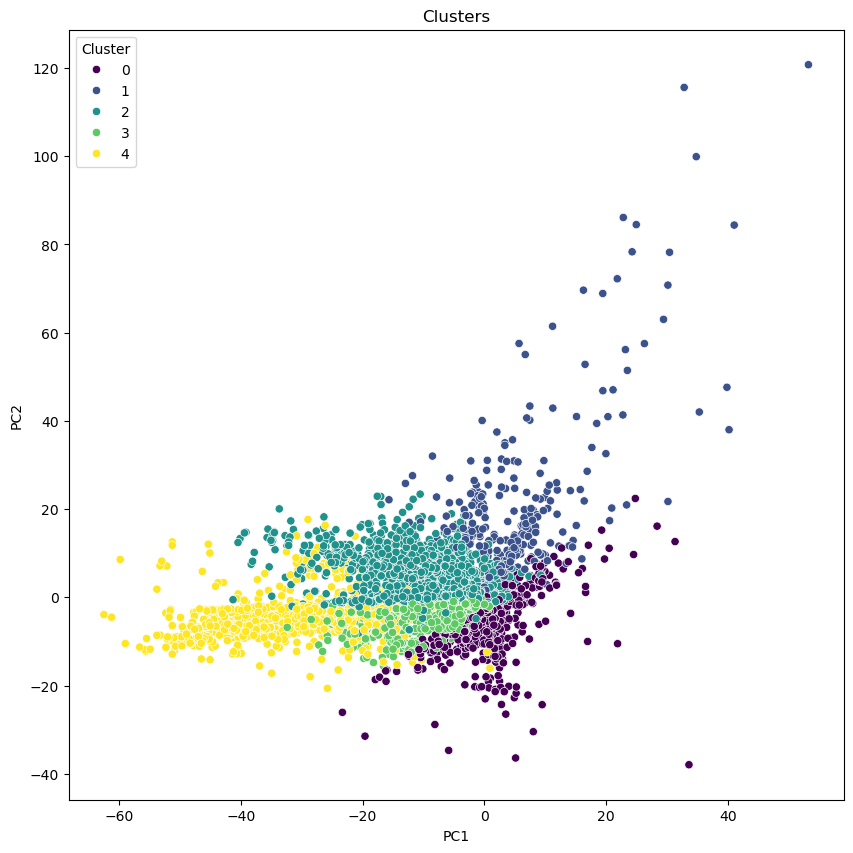

In [39]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', data=data_df_ann, hue='Cluster', palette='viridis')
plt.title('Clusters')
plt.show()

## Further analysis

Results from the previous analysis have made us believe that the chosen 5 clusters could be reduced to 3. This stems not only from the fact that clusters 2, 3 and 4 were exhibiting more similar values across all metrics, but also from the ambiguities arising when using the elbow method. The graph did in fact show a change in the decrease rate of the WCSS after the value '3', which rose again after value '4'.
We will therefore propose again the same analysis as before, but with 3 clusters instead of 5.

In [43]:
# we scale the data
customers_df_2 = customers_df.copy()
scaler = StandardScaler()
data_df_scaled_2 = scaler.fit_transform(customers_df.iloc[:,1:18])
data_df_scaled_2 = pd.DataFrame(data_df_scaled, columns=customers_df.columns[1:18])
data_df_scaled_2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


In [45]:
# Kmeans using 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
customers_df_2['Cluster'] = kmeans.fit_predict(data_df_scaled_2)
customers_df_2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [49]:
# Describe the clusters
cluster_means_2 = customers_df_2.iloc[:,1:].groupby('Cluster').mean()
cluster_means_2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,4545.974404,0.968555,578.629243,363.840483,214.870685,4513.943197,0.286012,0.136806,0.187025,0.483019,14.266720,8.379533,7469.463776,3587.216766,2086.889127,0.036493,11.388396
1,943.444730,0.789577,302.146789,207.553551,94.891652,530.425643,0.244520,0.091332,0.147935,0.104059,1.913578,3.981794,3221.355927,927.922179,576.084073,0.093135,11.396140
2,1288.676491,0.968227,2185.116559,1239.540251,945.965035,235.200775,0.926645,0.389155,0.747676,0.043082,0.840635,32.730476,5164.938528,2168.096589,799.508527,0.287573,11.743492


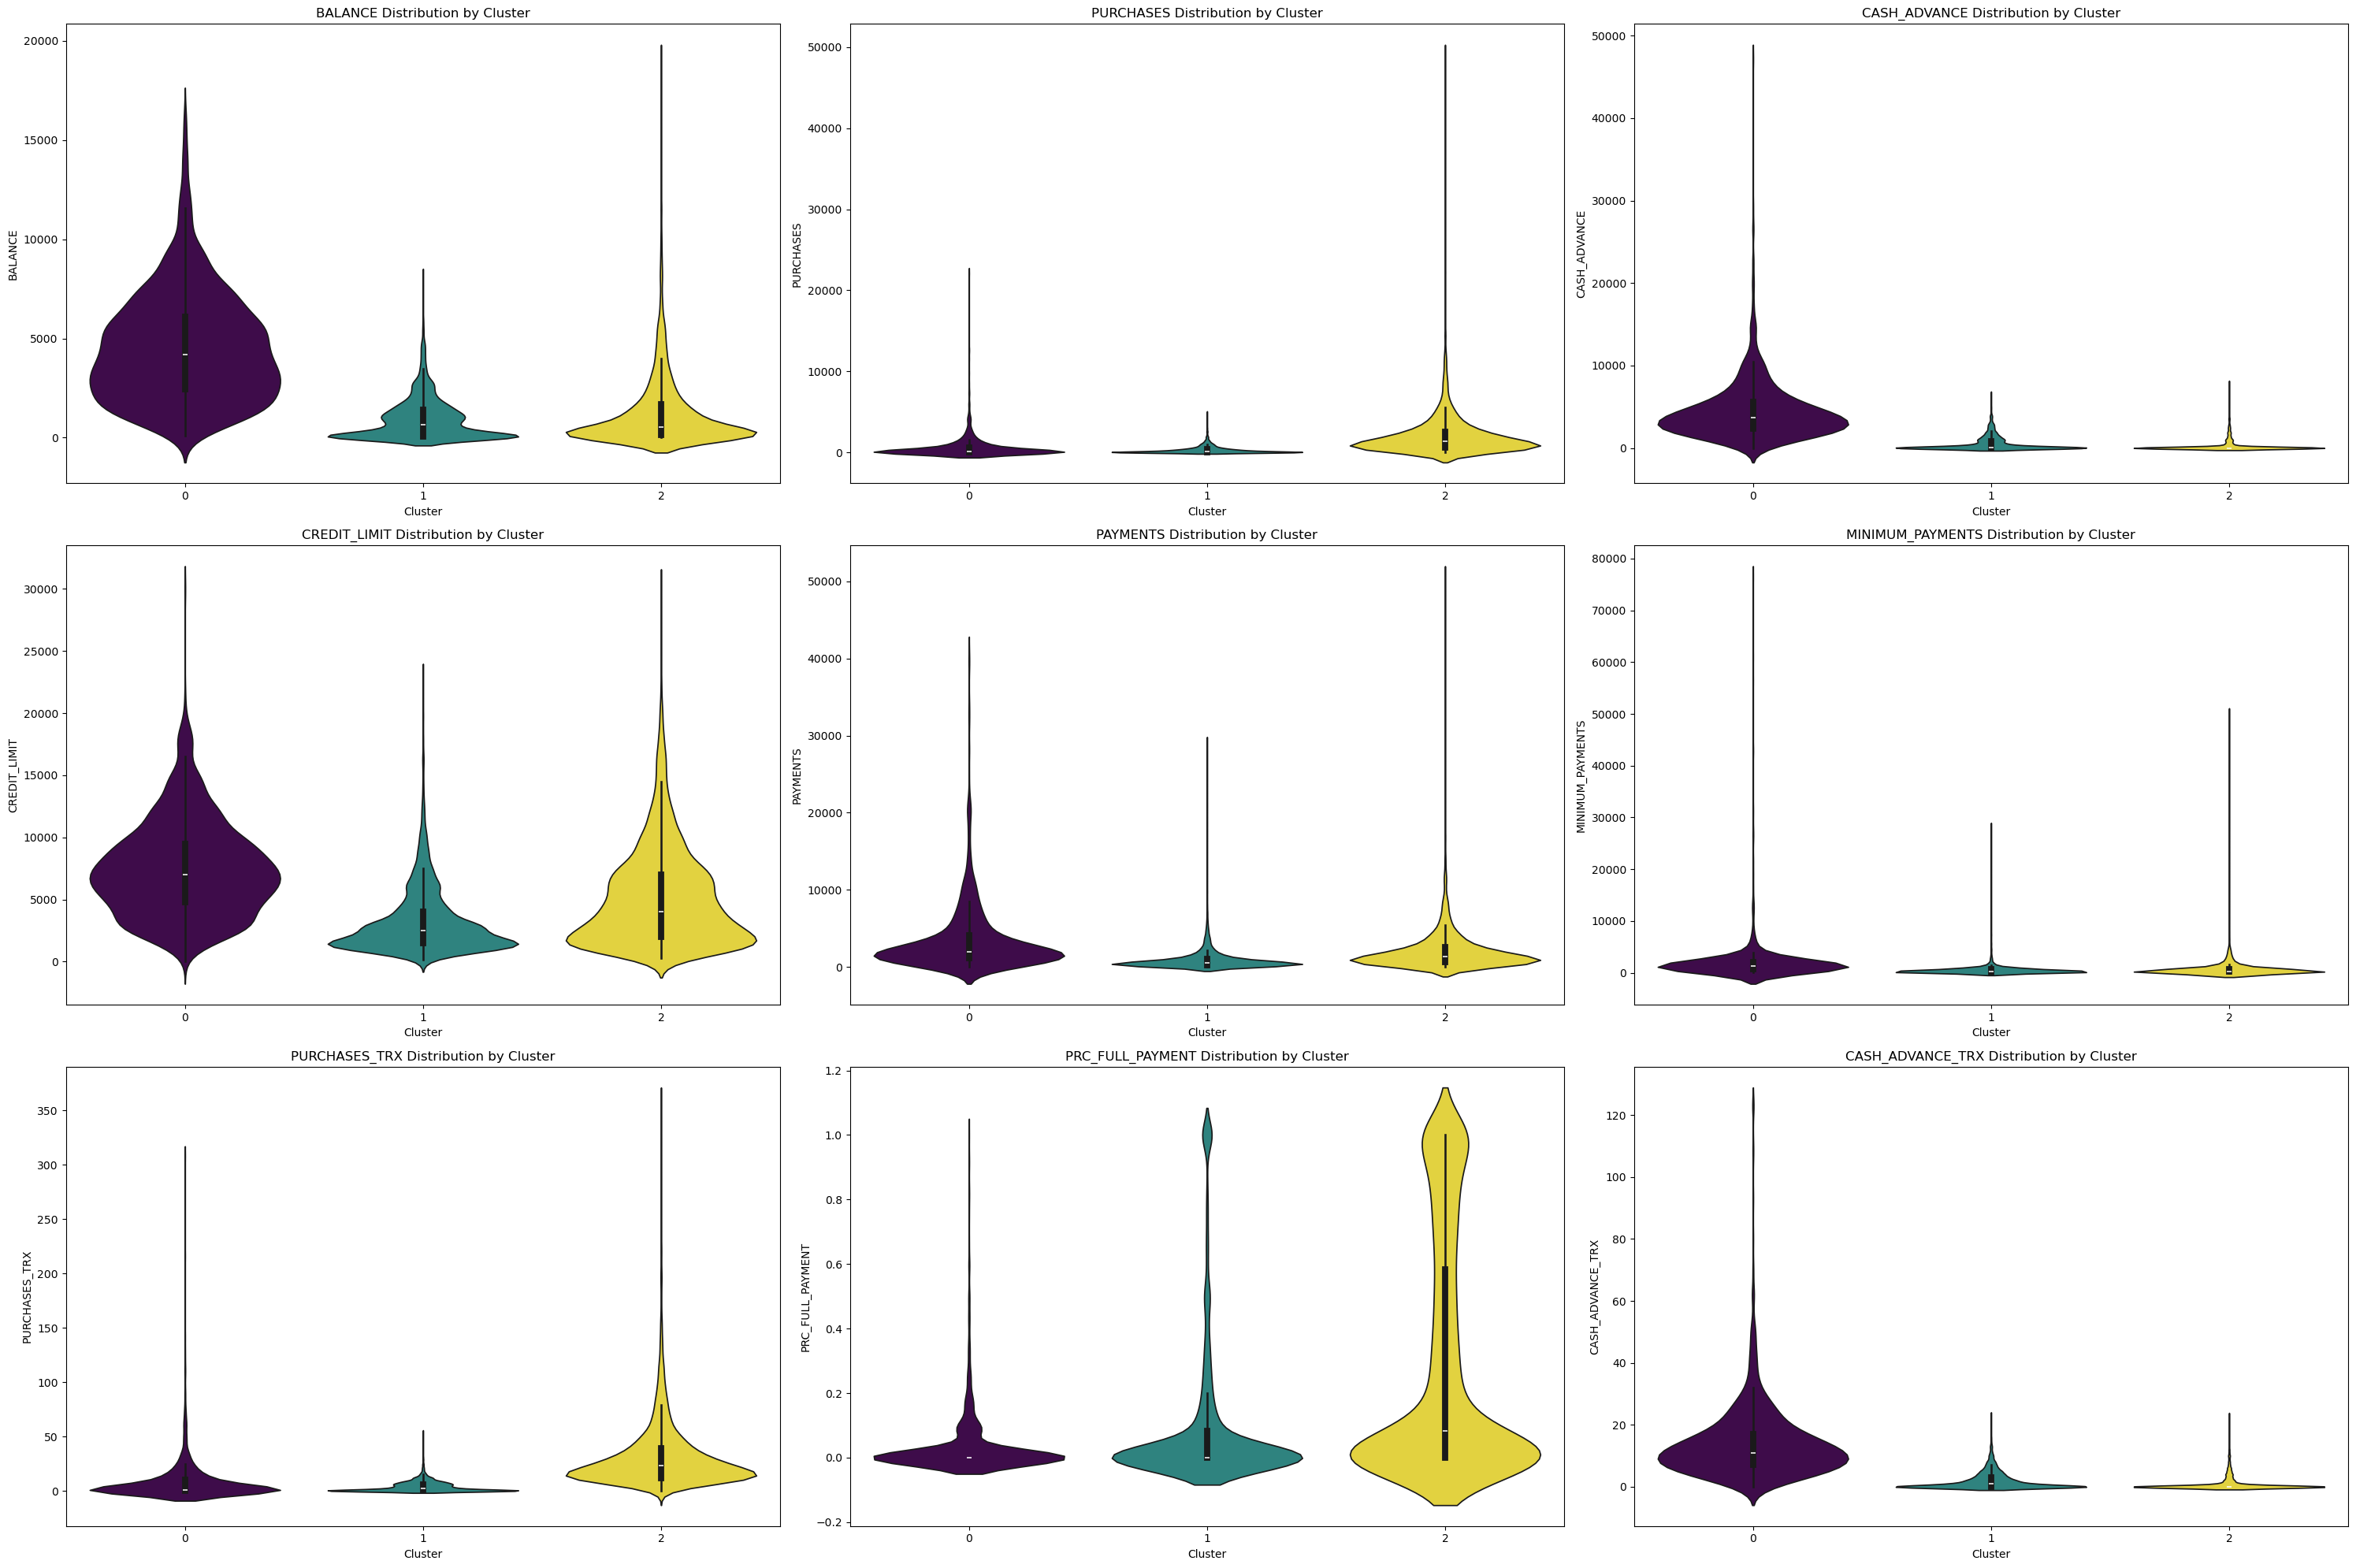

In [50]:
# Description of the clusters
fig, ax = plt.subplots(3, 3, figsize=(30, 20))
for i, feature in enumerate(key_features):
    sns.violinplot(x='Cluster', y=feature, data=customers_df_2, ax=ax[i//3, i%3], hue='Cluster', legend=False, palette='viridis')
    ax[i//3, i%3].set_title(f'{feature} Distribution by Cluster')
plt.tight_layout()
plt.show()

It can be observed that the 3 clusters are now more neatly separated. In this case, the marketing campaign should target cluster 0, whose customers have higher spending and cash advance values. 

Text(0.5, 1.0, 'Customer Segment Profiles Based on Credit Usage Metrics')

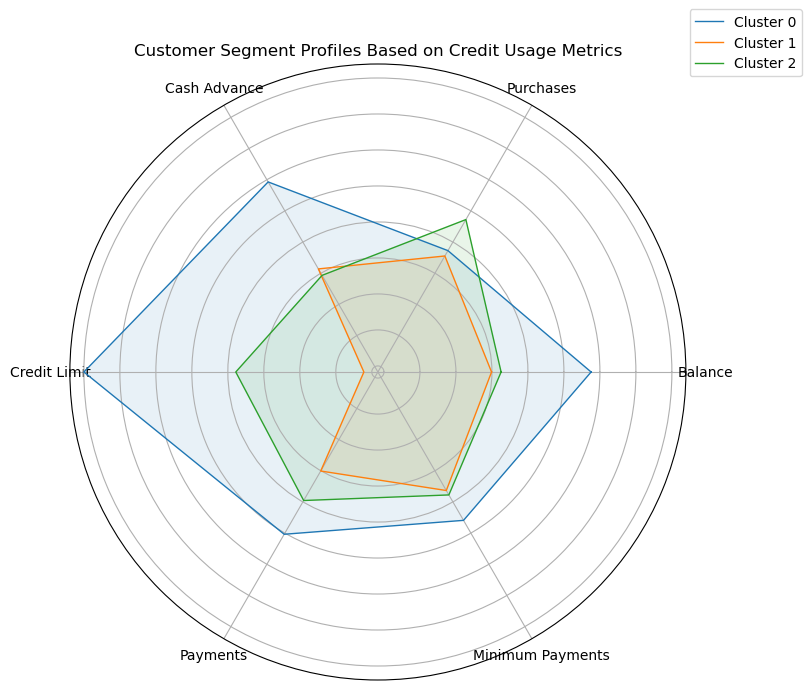

In [52]:
# Sample data for visualization purposes based on the analysis summary
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
balance = [x for x in cluster_means_2['BALANCE']]
purchases = [x for x in cluster_means_2['PURCHASES']]
cash_advance = [x for x in cluster_means_2['CASH_ADVANCE']]
credit_limit = [x for x in cluster_means_2['CREDIT_LIMIT']]
payments = [x for x in cluster_means_2['PAYMENTS']]
minimum_payments = [x for x in cluster_means_2['MINIMUM_PAYMENTS']]

# Normalize data for radar plot
max_value = max(max(balance), max(purchases), max(cash_advance), max(credit_limit), max(payments), max(minimum_payments))
balance_norm = [(b - np.mean(balance)) / (max_value - np.mean(balance)) for b in balance]
purchases_norm = [(p - np.mean(purchases)) / (max_value - np.mean(purchases)) for p in purchases]
cash_advance_norm = [(c - np.mean(cash_advance)) / (max_value - np.mean(cash_advance)) for c in cash_advance]
credit_limit_norm = [(cl - np.mean(credit_limit)) / (max_value - np.mean(credit_limit)) for cl in credit_limit]
payments_norm = [(p - np.mean(payments)) / (max_value - np.mean(payments)) for p in payments]
minimum_payments_norm = [(mp - np.mean(minimum_payments)) / (max_value - np.mean(minimum_payments)) for mp in minimum_payments]

# Radar plot setup
labels = ['Balance', 'Purchases', 'Cash Advance', 'Credit Limit', 'Payments', 'Minimum Payments']
num_vars = len(labels)

# Create angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, cluster in enumerate(clusters):
    values = [balance_norm[i], purchases_norm[i], cash_advance_norm[i], credit_limit_norm[i], payments_norm[i], minimum_payments_norm[i]]
    values += values[:1]  # Complete the circle for each cluster
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=cluster)
    ax.fill(angles, values, alpha=0.1)

# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

# Title
plt.title('Customer Segment Profiles Based on Credit Usage Metrics')

In [53]:
# PCA (2 components) for visualization
pca = PCA(n_components=2)
data_df_pca_2 = pca.fit_transform(data_df_scaled_2.iloc[:,1:]) # we exclude the first column as it contains the customer IDs
data_df_pca_2 = pd.DataFrame(data_df_pca_2, columns=['PC1', 'PC2'])
data_df_pca_2['Cluster'] = customers_df_2['Cluster']
data_df_pca_2.head()

,PC1,PC2,Cluster
0,-1.551041,-1.032412,1
1,-1.376490,2.268116,0
2,0.960032,-0.576085,2
3,-0.881967,-0.085798,1
4,-1.524800,-0.787013,1


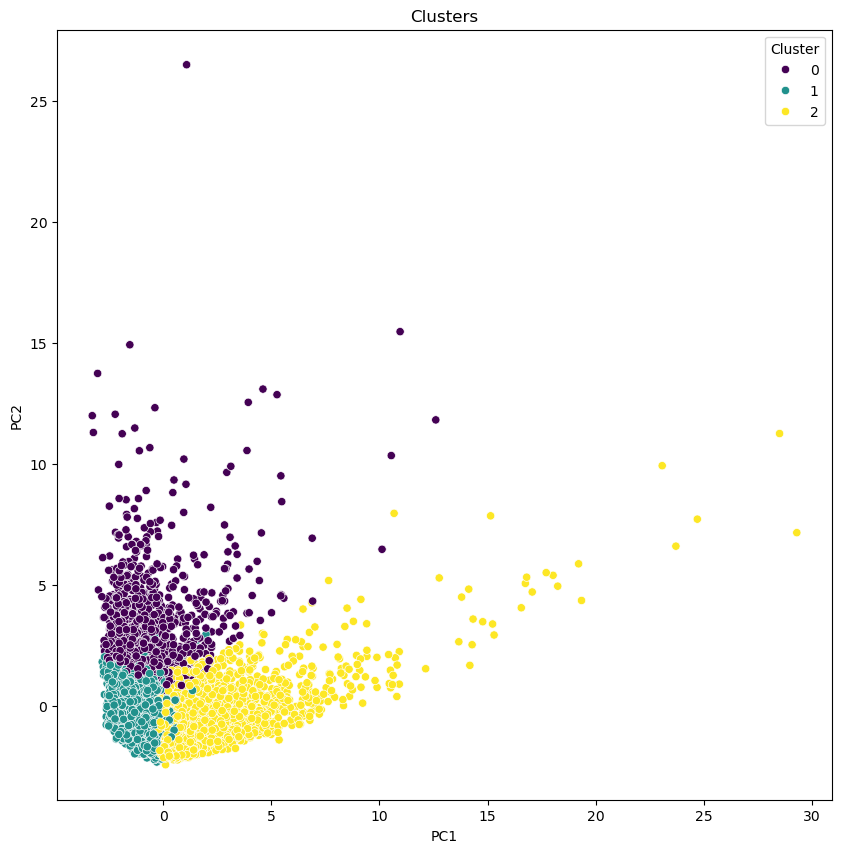

In [54]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', data=data_df_pca_2, hue='Cluster', palette='viridis')
plt.title('Clusters')
plt.show()